In [1]:
import numpy as np
from PIL import Image, ImageDraw, ImageFont
from skimage import transform as tf

In [2]:
def create_captcha(text, shear=0, size=(100, 30), scale=1):
    im = Image.new("L", size, "black")
    draw = ImageDraw.Draw(im)
    font = ImageFont.truetype(r"bretan/Coval-Black.otf", 22)
    draw.text((0, 0), text, fill=1, font=font)
    image = np.array(im)
    affine_tf = tf.AffineTransform(shear=shear)
    image = tf.warp(image, affine_tf)
    image = image / image.max()
    # 应用缩放
    shape = image.shape
    shapex, shapey = (int(shape[0] * scale), int(shape[1] * scale))
    image = tf.resize(image, (shapex, shapey))
    return image

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


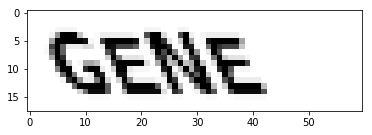

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
image = create_captcha("GENE", shear=0.5, scale=0.6)
plt.imshow(image, cmap='Greys')

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


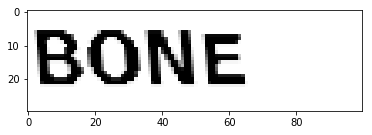

In [4]:
image = create_captcha("BONE", shear=0.1, scale=1.0)
plt.imshow(image, cmap='Greys')

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


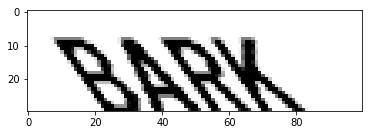

In [5]:
image = create_captcha("BARK", shear=0.8, scale=1.0)
plt.imshow(image, cmap='Greys')

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


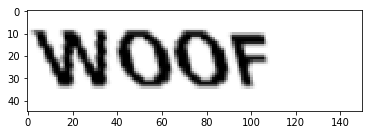

In [6]:
image = create_captcha("WOOF", shear=0.25, scale=1.5)
plt.imshow(image, cmap='Greys')

In [7]:
from skimage.measure import label, regionprops

def segment_image(image):
    # 标记函数能找出连通的非黑色像素组成的子图像
    labeled_image = label(image>0.2, connectivity=1, background=0)
    subimages = []
    # 用 regionprops 函数分离子图像
    # 此处替换了原书代码，修正了子图像顺序
    regions = regionprops(labeled_image)
    regions.sort(key=lambda x:x.bbox[1])
    for region in regions:
        # 提取子图像
        start_x, start_y, end_x, end_y = region.bbox
        subimages.append(image[start_x:end_x,start_y:end_y])
        if len(subimages) == 0:
            # 没有找到子图像，则返回完整图像
            return [image,]
    return subimages

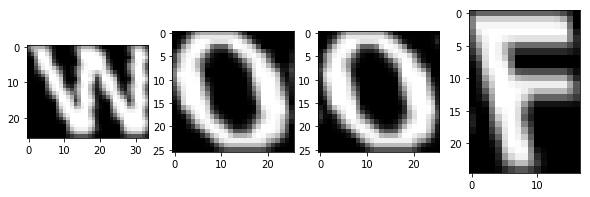

In [8]:
subimages = segment_image(image)
f, axes = plt.subplots(1, len(subimages), figsize=(10, 3))
for i in range(len(subimages)):
    axes[i].imshow(subimages[i], cmap="gray")

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


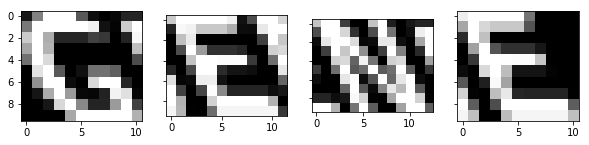

In [9]:
image = create_captcha("GENE", shear=0.5, scale=0.6)
subimages = segment_image(image)
f, axes = plt.subplots(1, len(subimages), figsize=(10, 3), sharey=True)
for i in range(len(subimages)):
    axes[i].imshow(subimages[i], cmap="gray")

In [10]:
from sklearn.utils import check_random_state
random_state = check_random_state(14)
letters = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ")
shear_values = np.arange(0, 0.8, 0.05)
scale_values = np.arange(0.9, 1.1, 0.1)

# 此处替换了原书代码，避免样本重复
import itertools
sample_params = list(itertools.product(letters, shear_values, scale_values))
random_state.shuffle(sample_params)

In [11]:
def generate_sample(random_state=None):
    random_state = check_random_state(random_state)
    letter = random_state.choice(letters)
    shear = random_state.choice(shear_values)
    scale = random_state.choice(scale_values)
    # 我们把图像尺寸设置为(30, 30)，以确保图像中能显示下所有的文字
    return create_captcha(letter, shear=shear, size=(30, 30),
                          scale=scale), letters.index(letter)

# 此处替换了原书代码，避免样本重复
def generate_samples(size, random_state=None):
    return zip(*[(create_captcha(sample_params[i][0], shear=sample_params[i][1],
                  size=(30, 30), scale=sample_params[i][2]),
                 letters.index(sample_params[i][0])) for i in range(size)])

The target for this image is: 18


c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


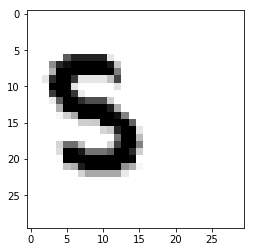

In [12]:
image, target = generate_sample(random_state)
plt.imshow(image, cmap="Greys")
print("The target for this image is: {0}".format(target))

In [13]:
# 此处替换了原书代码，避免样本重复
dataset, targets = generate_samples(1000)
dataset = np.array([tf.resize(segment_image(sample)[0], (20, 20)) for
                    sample in dataset])
dataset = np.array(dataset, dtype='float')
targets = np.array(targets)

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [14]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder()
y = onehot.fit_transform(targets.reshape(targets.shape[0],1))

In [15]:
y = y.todense()
X = dataset.reshape((dataset.shape[0], dataset.shape[1] *
                     dataset.shape[2]))

In [16]:
from sklearn.cross_validation import train_test_split
# 训练数据集比例调整为0.8，避免测试数据集中字母覆盖不全
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=14)

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [17]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100,), random_state=14)

In [18]:
clf.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 14,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [19]:
clf.fit(X_train, y_train)

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=14, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [20]:
y_pred = clf.predict(X_test)

In [21]:
from sklearn.metrics import f1_score
f1_score(y_pred=y_pred, y_true=y_test, average='macro')

0.9931623931623932

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_pred=y_pred, y_true=y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00        11
          2       1.00      1.00      1.00         9
          3       1.00      1.00      1.00         6
          4       1.00      1.00      1.00         7
          5       1.00      1.00      1.00         4
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         8
          8       0.88      1.00      0.93         7
          9       1.00      1.00      1.00         6
         10       1.00      1.00      1.00         9
         11       1.00      1.00      1.00        11
         12       1.00      1.00      1.00         5
         13       1.00      0.80      0.89         5
         14       1.00      1.00      1.00         9
         15       1.00      1.00      1.00        13
         16       1.00      1.00      1.00         3
         17       1.00      1.00      1.00   

In [23]:
def predict_captcha(captcha_image, neural_network):
    subimages = segment_image(captcha_image)
    # 执行转换，与训练数据中的一样
    dataset = np.array([tf.resize(subimage, (20, 20)) for subimage in
                                  subimages])
    X_test = dataset.reshape((dataset.shape[0], dataset.shape[1] *
                              dataset.shape[2]))
    # 用predict_proba和argmax获取最可能的预测
    y_pred = neural_network.predict_proba(X_test)
    predictions = np.argmax(y_pred, axis=1)
    # 把预测转换为字母
    predicted_word = str.join("", [letters[prediction] for prediction in
                                   predictions])
    return predicted_word

GENE


c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


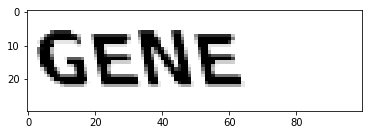

In [24]:
word = "GENE"
captcha = create_captcha(word, shear=0.2)
print(predict_captcha(captcha, clf))
plt.imshow(captcha, cmap="Greys")

In [25]:
def test_prediction(word, net, shear=0.2, scale=1):
    captcha = create_captcha(word, shear=shear, scale=scale,
                             size=(len(word) * 25, 30))
    prediction = predict_captcha(captcha, net)
    return word == prediction, word, prediction

In [26]:
from nltk.corpus import words
valid_words = set([word.upper() for word in words.words() if len(word) == 4])

In [27]:
num_correct = 0
num_incorrect = 0
for word in valid_words:
    shear = random_state.choice(shear_values)
    scale = random_state.choice(scale_values)
    correct, word, prediction = test_prediction(word, clf, shear=shear,
                                                scale=scale)
    if correct:
        num_correct += 1
    else:
        num_incorrect += 1
print("Number correct is {0}".format(num_correct))
print("Number incorrect is {0}".format(num_incorrect))
print("Accurary is {0}".format(num_correct / (num_correct + num_incorrect)))

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Number correct is 3144
Number incorrect is 1851
Accurary is 0.6294294294294295


In [28]:
def evaluation_versus_shear(shear_value):
    num_correct = 0
    num_incorrect = 0
    for word in valid_words:
        scale = random_state.choice(scale_values)
        correct, word, prediction = test_prediction(
            word, clf, shear=shear_value, scale=scale)
        if correct:
            num_correct += 1
        else:
            num_incorrect += 1
    return num_correct / (num_correct+num_incorrect)

In [29]:
scores = [evaluation_versus_shear(shear) for shear in shear_values]

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


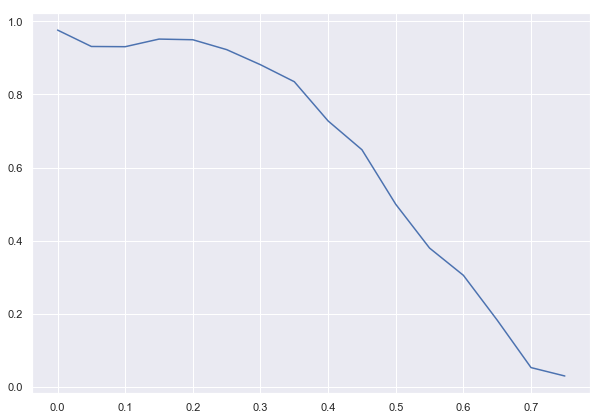

In [30]:
import seaborn
seaborn.set(style="darkgrid")
plt.figure(figsize=(10, 7))
plt.ylabel = "Accuracy"
plt.xlabel = "Shear"
plt.plot(shear_values, scores)

In [31]:
from nltk.metrics import edit_distance
steps = edit_distance("STEP", "STOP")
print("The number of steps needed is: {0}".format(steps))

The number of steps needed is: 1


In [32]:
def compute_distance(prediction, word):
    len_word = min(len(prediction), len(word))
    return len_word - sum([prediction[i] == word[i] for i in
                           range(len_word)])

In [33]:
from operator import itemgetter

def improved_prediction(word, net, dictionary, shear=0.2, scale=1.0):
    captcha = create_captcha(word, shear=shear, scale=scale)
    prediction = predict_captcha(captcha, net)

    if prediction not in dictionary:
        distances = sorted([(word, compute_distance(prediction, word))
                            for word in dictionary], key=itemgetter(1))
        best_word = distances[0]
        prediction = best_word[0]
    return word == prediction, word, prediction

In [34]:
num_correct = 0
num_incorrect = 0
for word in valid_words:
    shear = random_state.choice(shear_values)
    scale = random_state.choice(scale_values)
    correct, word, prediction = improved_prediction(
        word, clf, valid_words, shear=shear, scale=scale)
    if correct:
        num_correct += 1
    else:
        num_incorrect += 1
print("Number correct is {0}".format(num_correct))
print("Number incorrect is {0}".format(num_incorrect))
print("Accurary is {0}".format(num_correct / (num_correct + num_incorrect)))

c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
c:\users\yinian\appdata\local\programs\python\python36\lib\site-packages\skimage\transform\_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Number correct is 3423
Number incorrect is 1572
Accurary is 0.6852852852852853
